#### Import of Libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [127]:
df = pd.read_csv('datasets/yeast/yeast.csv')
df=df.drop(columns=["SequenceName"])

In [128]:
df.head(5)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [129]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   Class   1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB
Number of duplicated rows is:  31
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

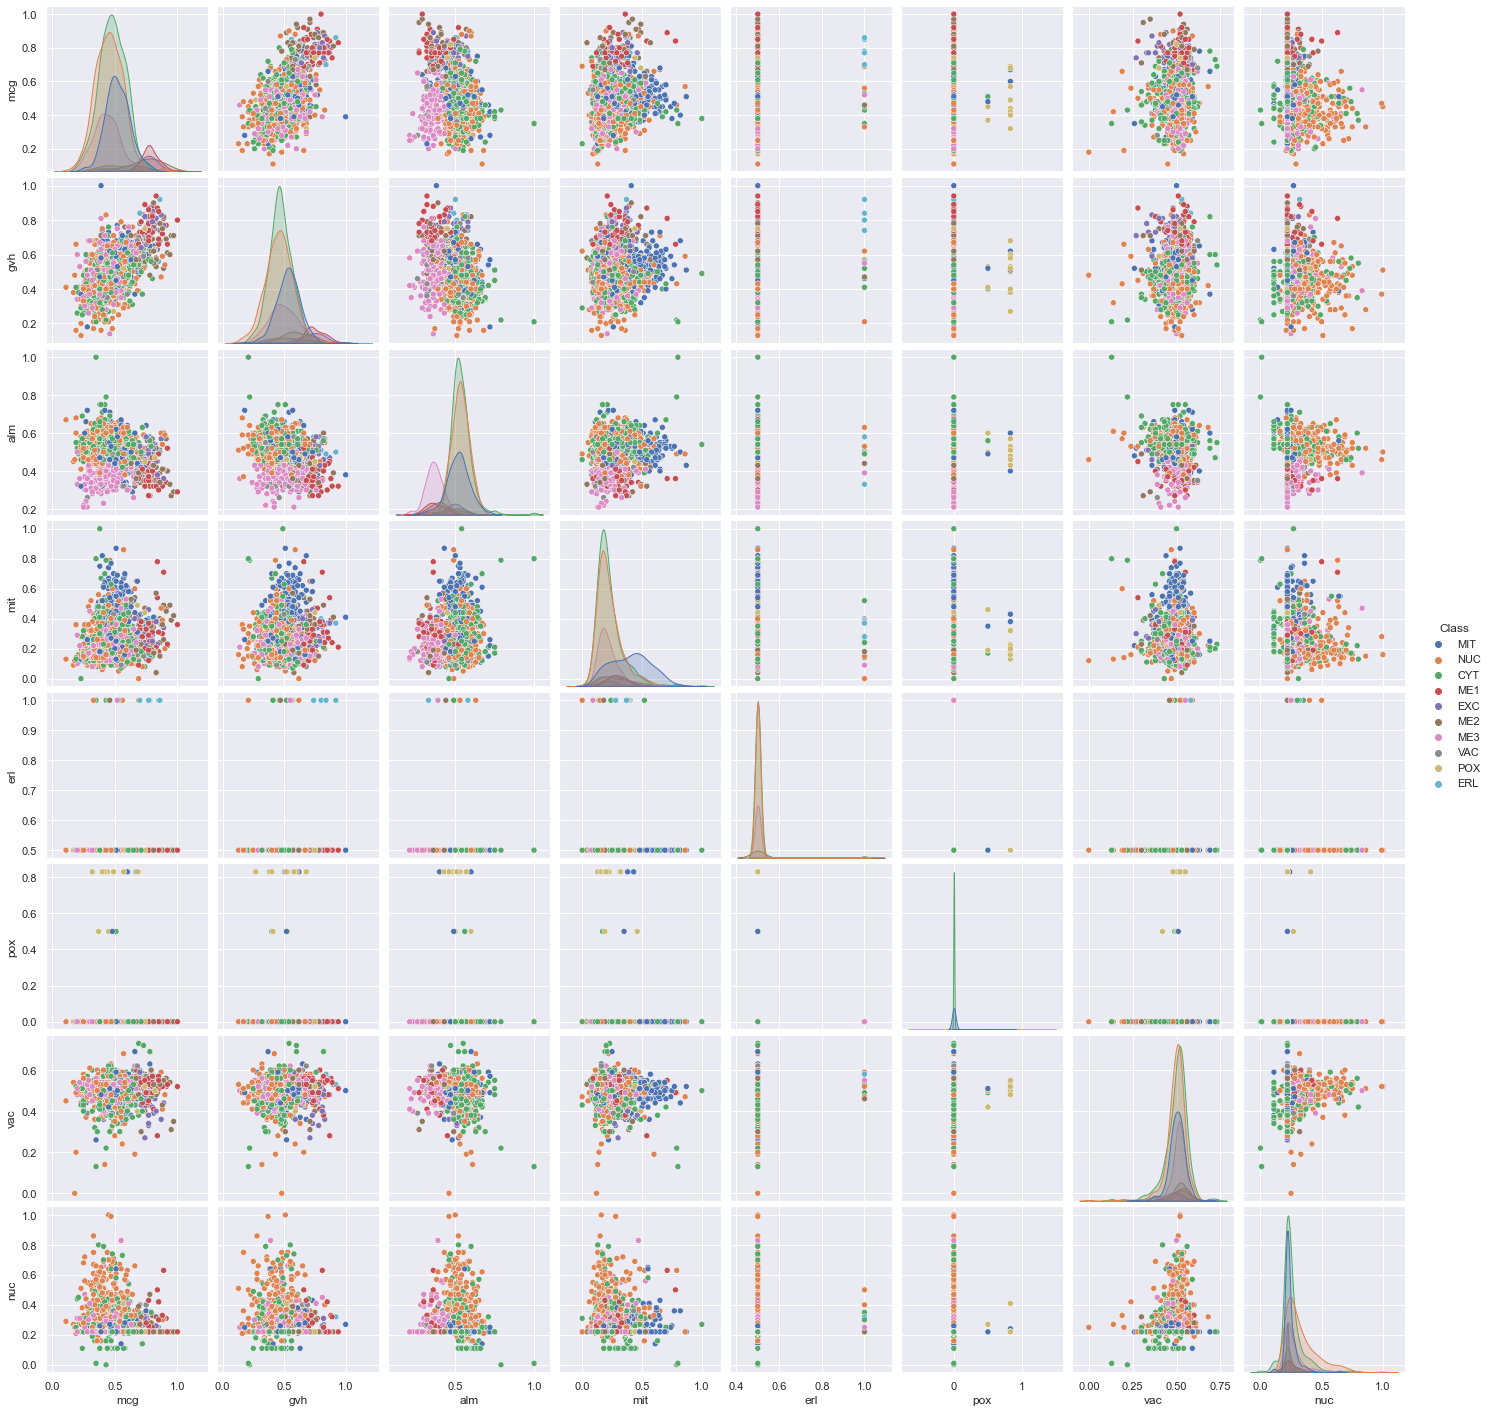

In [130]:
sns.pairplot(df, hue='Class')
plt.show()

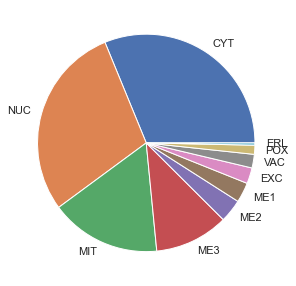

In [131]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [132]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mcg,1484.0,0.500121,0.137299,0.11,0.41,0.49,0.58,1.00
gvh,1484.0,0.499933,0.123924,0.13,0.42,0.49,0.57,1.00
alm,1484.0,0.500034,0.086670,0.21,0.46,0.51,0.55,1.00
mit,1484.0,0.261186,0.137098,0.00,0.17,0.22,0.32,1.00
erl,1484.0,0.504717,0.048351,0.50,0.50,0.50,0.50,1.00
pox,1484.0,0.007500,0.075683,0.00,0.00,0.00,0.00,0.83
vac,1484.0,0.499885,0.057797,0.00,0.48,0.51,0.53,0.73
nuc,1484.0,0.276199,0.106491,0.00,0.22,0.22,0.30,1.00


#### Standardize the Data

In [133]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mcg,1484.0,2.657353e-16,1.000337,-2.842351,-0.656607,-0.073742,0.581981,3.642023
gvh,1484.0,4.788024e-17,1.000337,-2.986155,-0.645229,-0.080178,0.565595,4.036624
alm,1484.0,1.675808e-17,1.000337,-3.347532,-0.462064,0.115030,0.576705,5.770548
mit,1484.0,9.576048e-17,1.000337,-1.905752,-0.665341,-0.300515,0.429138,5.390779
erl,1484.0,-1.153914e-15,1.000337,-0.097590,-0.097590,-0.097590,-0.097590,10.246951
pox,1484.0,4.788024e-18,1.000337,-0.099131,-0.099131,-0.099131,-0.099131,10.871410
vac,1484.0,1.005485e-15,1.000337,-8.651963,-0.344175,0.175062,0.521219,3.982798
nuc,1484.0,1.101245e-16,1.000337,-2.594527,-0.527919,-0.527919,0.223574,6.799145


#### Observations and Variables

In [134]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

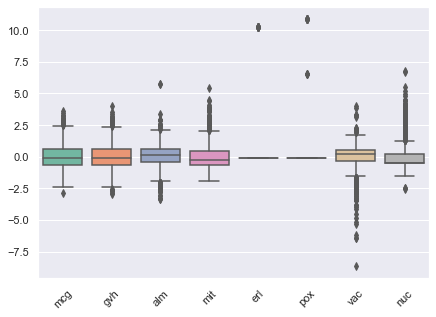

In [135]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

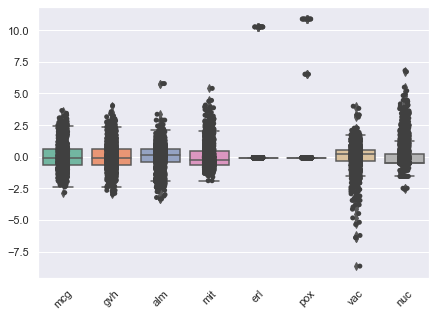

In [136]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

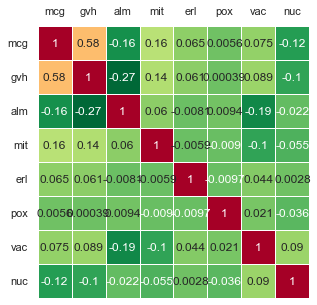

In [137]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [138]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [139]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.872336,-0.094224,0.285774,-0.116479,-0.979864,0.683138,-0.498766,0.200863
1,0.813482,-0.160523,0.152545,-0.166802,-0.346108,-0.382470,0.143425,1.321999
2,1.283115,-0.375049,0.304935,-0.048115,-0.764992,-0.063218,-0.864396,0.023209
3,-0.229858,-0.266093,0.335878,0.244376,-0.752674,-0.680708,-1.118094,-0.587386
4,-0.181205,1.265672,-0.286068,-0.267155,0.618660,-0.732569,1.573558,-0.003824
...,...,...,...,...,...,...,...,...
1479,2.311750,-0.445092,0.288554,-0.210403,-0.728035,0.174600,-0.795287,-0.916295
1480,-1.107847,0.475247,-0.974241,-0.096363,1.920679,0.040209,-0.585225,-0.104522
1481,1.838673,-1.181639,0.371270,-0.362901,-0.748863,-0.160463,0.281004,-0.634374
1482,-1.463039,-0.715360,-0.267485,0.142417,0.476055,-0.278812,-1.081531,-0.061170


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (22.6% expl.var)', ylabel='PC2 (15.8% expl.var)'>)

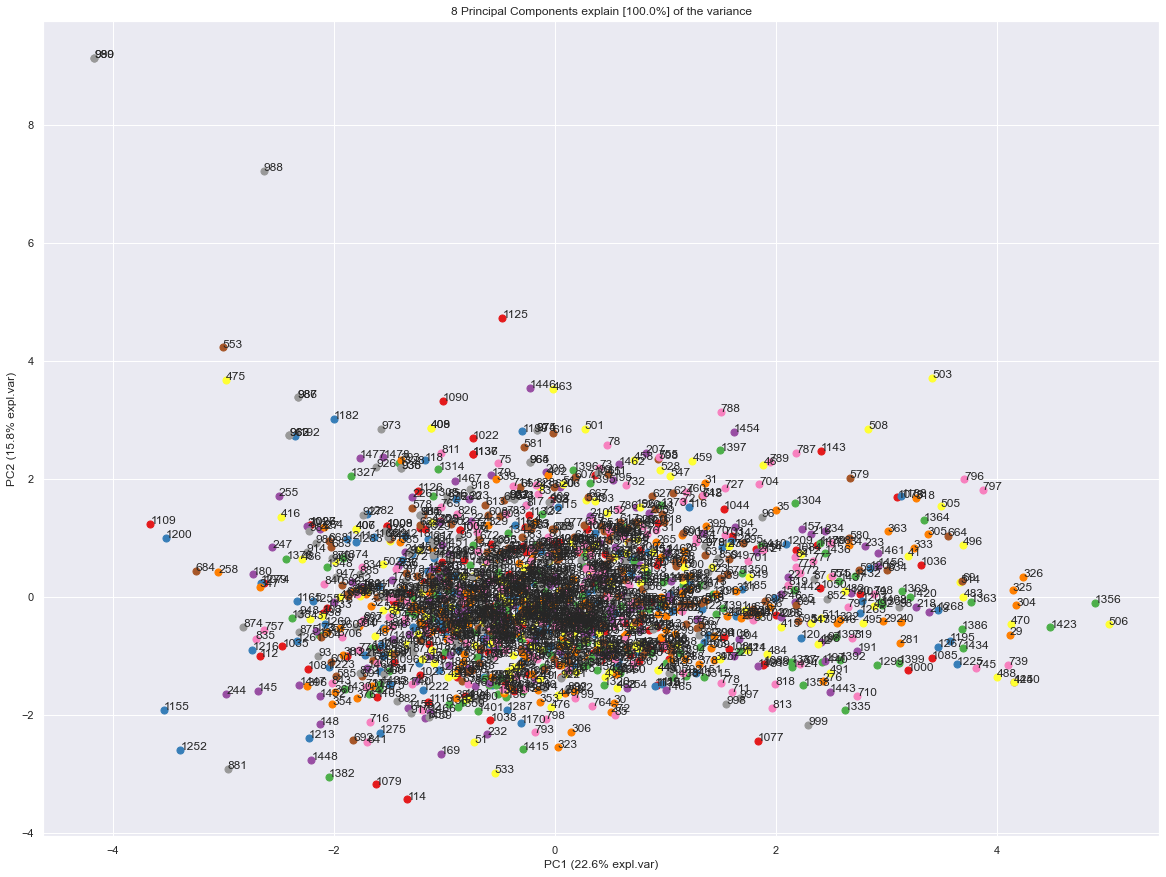

In [140]:
model.scatter(label=True, legend=False)

Eigenvectors

In [141]:
A = out['loadings'].T

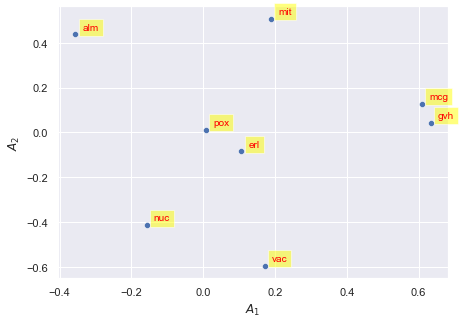

In [142]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

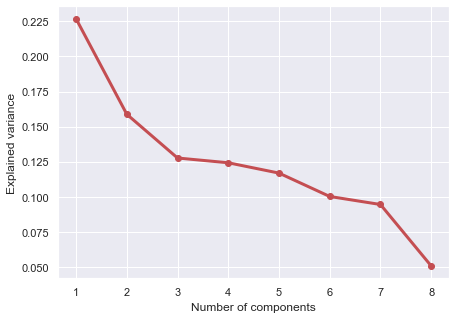

In [143]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

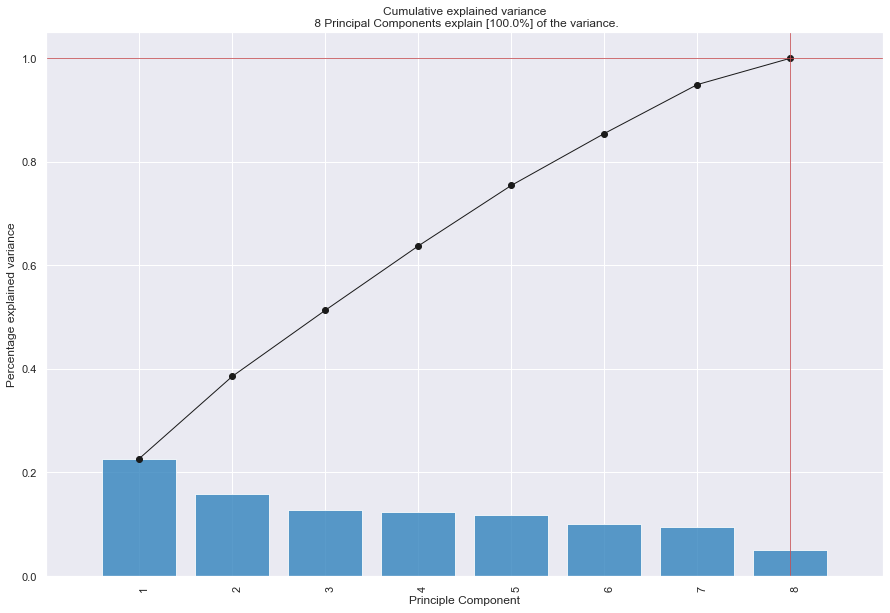

<Figure size 504x360 with 0 Axes>

In [144]:
model.plot();